In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
print(len(tf.config.list_physical_devices('GPU')))

1


In [ ]:
import zipfile

In [ ]:
local_zip = 'D:/Cars vs Motorbike/archive.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Cars vs Motorbike/')
zip_ref.close()

In [6]:
car_dir = 'D:\Cars vs Motorbike\Car-Bike-Dataset\Car'
motor_dir = 'D:\Cars vs Motorbike\Car-Bike-Dataset\Bike'
print(len(os.listdir(car_dir)))
print(len(os.listdir(motor_dir)))

2000
2000


In [7]:
import random

for i in range (5):
    print(random.choice(os.listdir(motor_dir)))

Bike (303).jpeg
Bike (911).jpeg
Bike (1496).jpeg
Bike (943).jpeg
Bike (126).jpeg


In [8]:
source_path = 'D:\Cars vs Motorbike\Car-Bike-Dataset'

source_path_car = os.path.join(source_path, 'Car')
source_path_motor = os.path.join(source_path,'Bike')

print(f'there are {len(os.listdir(source_path_car))} images of cars')
print(f'there are {len(os.listdir(source_path_motor))} images of motors')

there are 2000 images of cars
there are 2000 images of motors


In [ ]:
import shutil

root_dir = "D:/Cars vs Motorbike/cars-vs-motors"

if os.path.exists(root_dir):
    shutil.rmtree(root_dir)


def create_train_val_dirs(root_path):
    os.makedirs(root_path)
    os.makedirs(os.path.join(root_path, "training"))
    os.makedirs(os.path.join(root_path, "training", "cars"))
    os.makedirs(os.path.join(root_path, "validation"))
    os.makedirs(os.path.join(root_path, "training", "motors"))
    os.makedirs(os.path.join(root_path, "validation", "cars"))
    os.makedirs(os.path.join(root_path, "validation", "motors"))
    pass


try:
    create_train_val_dirs(root_path=root_dir)
except:
    print(
        "You should not be seeing this since the upper directory is removed beforehand"
    )

In [9]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

NameError: name 'root_dir' is not defined

In [10]:
from shutil import copyfile


def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    filtered_files = []
    for filename in os.listdir(SOURCE_DIR):
        file_path = os.path.join(SOURCE_DIR, filename)
        if os.path.getsize(file_path):
            filtered_files.append(filename)
        else:
            print(f"{filename} is zero length, so ignoring")
    random_files = random.sample(filtered_files, len(filtered_files))
    split = int(SPLIT_SIZE * len(filtered_files))
    training_files = random_files[:split]
    validation_files = random_files[split:]

    for filename in training_files:
        copyfile(
            os.path.join(SOURCE_DIR, filename), os.path.join(TRAINING_DIR, filename)
        )
    for filename in validation_files:
        copyfile(
            os.path.join(SOURCE_DIR, filename), os.path.join(VALIDATION_DIR, filename)
        )
    pass

In [11]:
CAR_SOURCE_DIR = 'D:\Cars vs Motorbike\Car-Bike-Dataset\Car'
MOTOR_SOURCE_DIR = "D:\Cars vs Motorbike\Car-Bike-Dataset\Bike"

TRAINING_DIR = "D:/Cars vs Motorbike/cars-vs-motors/training/"
VALIDATION_DIR = "D:/Cars vs Motorbike/cars-vs-motors/validation/"

TRAINING_CARS_DIR = os.path.join(TRAINING_DIR, "cars")
VALIDATION_CARS_DIR = os.path.join(VALIDATION_DIR, "cars")

TRAINING_MOTORS_DIR = os.path.join(TRAINING_DIR, "motors")
VALIDATION_MOTORS_DIR = os.path.join(VALIDATION_DIR, "motors")

if len(os.listdir(TRAINING_CARS_DIR)) > 0:
    for file in os.scandir(TRAINING_CARS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_MOTORS_DIR)) > 0:
    for file in os.scandir(TRAINING_MOTORS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_CARS_DIR)) > 0:
    for file in os.scandir(VALIDATION_CARS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_MOTORS_DIR)) > 0:
    for file in os.scandir(VALIDATION_MOTORS_DIR):
        os.remove(file.path)

split_size = .9

split_data(CAR_SOURCE_DIR, TRAINING_CARS_DIR, VALIDATION_CARS_DIR, split_size)
split_data(MOTOR_SOURCE_DIR, TRAINING_MOTORS_DIR, VALIDATION_MOTORS_DIR, split_size)


print(f"\n\nOriginal car's directory has {len(os.listdir(CAR_SOURCE_DIR))} images")
print(f"Original motor's directory has {len(os.listdir(MOTOR_SOURCE_DIR))} images/n")

print(f"There are {len(os.listdir(TRAINING_CARS_DIR))} images of cars for training")
print(f"There are {len(os.listdir(TRAINING_MOTORS_DIR))} images of motors for training")
print(f"There are {len(os.listdir(VALIDATION_CARS_DIR))} images of cars for validation")
print(f"There are {len(os.listdir(VALIDATION_MOTORS_DIR))} images of motors for validation")



Original car's directory has 2000 images
Original motor's directory has 2000 images/n
There are 1800 images of cars for training
There are 1800 images of motors for training
There are 200 images of cars for validation
There are 200 images of motors for validation


In [12]:
from keras_preprocessing.image import ImageDataGenerator

In [13]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates the training and validation data generators

    Args:
      TRAINING_DIR (string): directory path containing the training images
      VALIDATION_DIR (string): directory path containing the testing/validation images

    Returns:
      train_generator, validation_generator - tuple containing the generators
    """
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=64,
        class_mode="binary",
        target_size=(150, 150),
    )

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=64,
        class_mode="binary",
        target_size=(150, 150),
    )
    ### END CODE HERE
    return train_generator, validation_generator

In [14]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 3600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    Dropout,
    MaxPooling2D,
    Flatten,
    Dense,
)
from keras.models import Sequential


def create_model():
    model = Sequential(
        [
            Conv2D(
                32,
                kernel_size=(3, 3),
                padding="same",
                activation="relu",
                input_shape=(150, 150, 3),
            ),
            MaxPooling2D(pool_size=(2, 2)),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            BatchNormalization(),
            Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            BatchNormalization(),
            Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            BatchNormalization(),
            Dropout(0.4),
            Flatten(),
            Dense(512, activation="relu"),
            Dense(1028, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                        

In [18]:
history = model.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/30
57/57 [==============================] - 11s 188ms/step - loss: 0.1519 - accuracy: 0.9408 - val_loss: 0.1348 - val_accuracy: 0.9500
Epoch 2/30
57/57 [==============================] - 10s 179ms/step - loss: 0.1418 - accuracy: 0.9400 - val_loss: 0.3973 - val_accuracy: 0.8650
Epoch 3/30
57/57 [==============================] - 10s 183ms/step - loss: 0.1345 - accuracy: 0.9492 - val_loss: 0.2155 - val_accuracy: 0.9175
Epoch 4/30
57/57 [==============================] - 10s 173ms/step - loss: 0.1417 - accuracy: 0.9394 - val_loss: 0.1695 - val_accuracy: 0.9450
Epoch 5/30
57/57 [==============================] - 10s 175ms/step - loss: 0.1377 - accuracy: 0.9456 - val_loss: 0.5176 - val_accuracy: 0.8125
Epoch 6/30
57/57 [==============================] - 10s 173ms/step - loss: 0.1180 - accuracy: 0.9514 - val_loss: 0.6125 - val_accuracy: 0.8625
Epoch 7/30
57/57 [==============================] - 10s 174ms/step - loss: 0.1512 - accuracy: 0.9408 - val_loss: 0.2263 - val_accuracy: 0.9350

In [20]:
import matplotlib.pyplot as plt

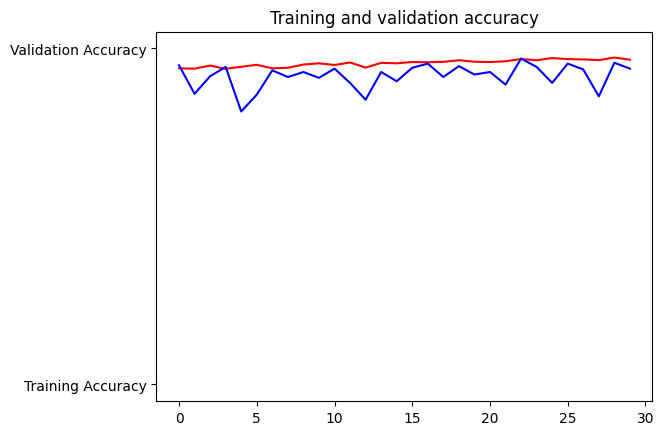

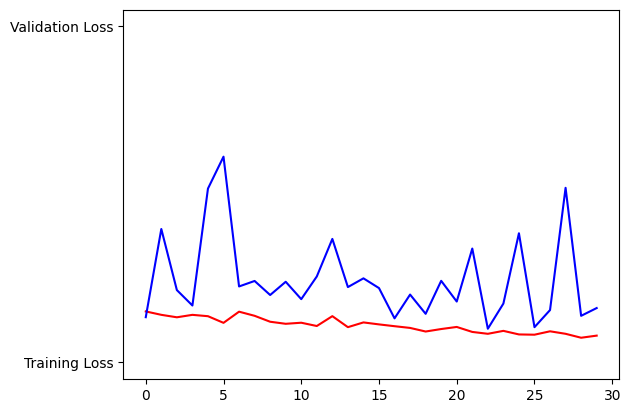

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [26]:
model.evaluate(validation_generator)

7/7 [==============================] - 1s 187ms/step - loss: 0.1635 - accuracy: 0.9400


[0.1635272204875946, 0.9399999976158142]